In [5]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [19]:
df =  web.DataReader('AAPL',data_source = 'yahoo',start = '2014-01-01', end = '2020-04-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,70.938835
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.380615
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,69.758965
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.260056
2014-01-08,77.937141,76.955711,76.972855,77.637146,64632400.0,69.698692
...,...,...,...,...,...,...
2020-03-26,258.679993,246.360001,246.520004,258.440002,63021800.0,258.440002
2020-03-27,255.869995,247.050003,252.750000,247.740005,51054200.0,247.740005
2020-03-30,255.520004,249.399994,250.740005,254.809998,41994100.0,254.809998


In [7]:
# Get No. of Rows and columns
df.shape

(1573, 6)

C:\Users\Jeyamaruthi Cr1mzie\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


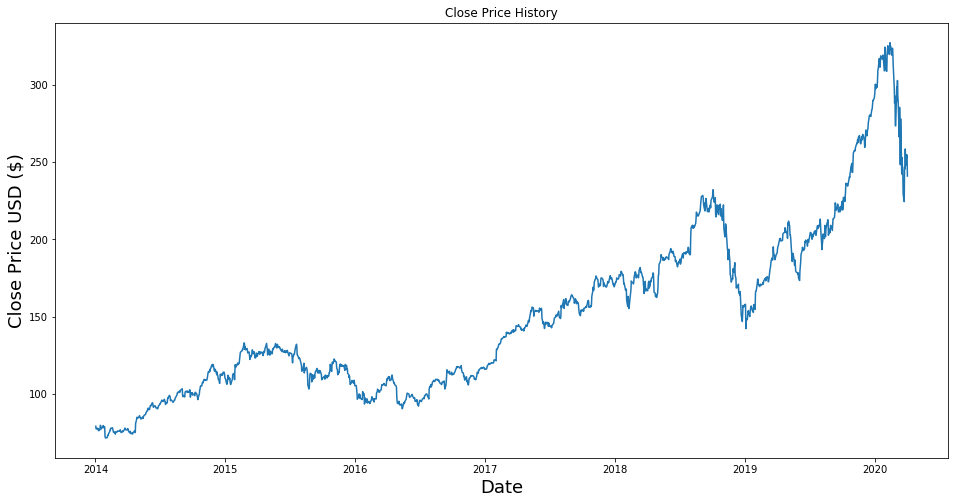

In [8]:
#Visualize the closing plot:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18 )
plt.show()

In [9]:
#create a new data frame with only 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe into a numpy array
dataset = data.values
#Compute the no. of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8) 
training_data_len

1259

In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02979415],
       [0.02300881],
       [0.02465627],
       ...,
       [0.71700859],
       [0.71497576],
       [0.6626699 ]])

In [11]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i,0])
    
    if i<=60:
        print(x_train)
        print(y_train)
        

[array([0.02979415, 0.02300881, 0.02465627, 0.02248385, 0.02439381,
       0.02051804, 0.01851873, 0.02007686, 0.02603011, 0.03215646,
       0.03041965, 0.02283567, 0.02752677, 0.02888943, 0.03149747,
       0.0258514 , 0.0283254 , 0.00375289, 0.00054172, 0.        ,
       0.00045794, 0.00097732, 0.00503179, 0.00715395, 0.00710928,
       0.01111347, 0.01631279, 0.02020529, 0.02018295, 0.02493549,
       0.02468979, 0.02580672, 0.02099274, 0.01751908, 0.01422413,
       0.01550861, 0.01244263, 0.00981225, 0.01557563, 0.014777  ,
       0.01562589, 0.01756933, 0.01819483, 0.01729568, 0.01712258,
       0.01739062, 0.02027789, 0.02056829, 0.01723985, 0.01391138,
       0.01505625, 0.01765869, 0.01758052, 0.01615084, 0.01847963,
       0.02200915, 0.02524824, 0.02233863, 0.02104299, 0.02070791])]
[0.020640889385340755]


In [12]:
# Convert X & Y Train to numpy arrays
x_train, y_train = np.array(x_train) , np.array(y_train)

In [13]:
#Reshape the data
#lstm expect the data to be 3 dimension
x_train.shape #it is 2 dimension

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1199, 60, 1)

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#Complie the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
#optimizer--> Used to improve the loss function
#loss --> used to measure how well the model did on training


In [16]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)
# fit is another name for train
#epochs is the number of iterations 

Epoch 1/1
1199/1199 [==============================] - 89s 74ms/step - loss: 0.0012


In [30]:
#Create the testing data set
#Create a new array containing scaled values from 1543 to 2003 
test_data = scaled_data[training_data_len - 60: , :]

#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [31]:
#Convert the data to a numphy array
x_test = np.array(x_test) #Converting in a numphy to utilize in LSTM model

In [32]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [35]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.324598518906126

C:\Users\Jeyamaruthi Cr1mzie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


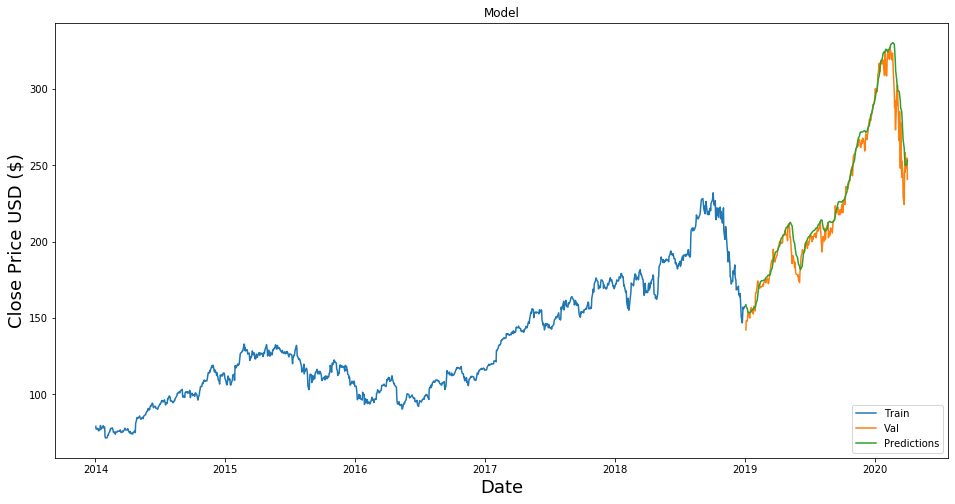

In [37]:
#Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [40]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo',start = '2014-01-01', end = '2020-04-01')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price value and convert the dataframe into an array:
last_60_days = new_df[-60:].values
#Scale the data to values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days to X_test list
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[253.7062]]


In [46]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo',start = '2020-04-02', end = '2020-04-02')
print(apple_quote2['Close'])

Date
2020-04-02    244.929993
Name: Close, dtype: float64
